#                                 Iris Flowers Classification

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
df = pd.read_csv('iris.data')

In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(149, 5)

In [20]:
df = df.rename(columns={'5.1':'sepallengthincm'})
df = df.rename(columns={'3.5': 'sepalwidthincm'})
df = df.rename(columns={'1.4': 'petallengthincm'})
df = df.rename(columns={'0.2': 'petalwidthincm'})
df = df.rename(columns={'Iris-setosa': 'species'})

In [21]:
df

,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepallengthincm    149 non-null float64
sepalwidthincm     149 non-null float64
petallengthincm    149 non-null float64
petalwidthincm     149 non-null float64
species            149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [23]:
df.describe()

,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.corr()

,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm
sepallengthincm,1.000000,-0.103784,0.871283,0.816971
sepalwidthincm,-0.103784,1.000000,-0.415218,-0.350733
petallengthincm,0.871283,-0.415218,1.000000,0.962314
petalwidthincm,0.816971,-0.350733,0.962314,1.000000


### Preprocessing

In [24]:
df.isnull().sum()

sepallengthincm    0
sepalwidthincm     0
petallengthincm    0
petalwidthincm     0
species            0
dtype: int64

In [25]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
144    False
145    False
146    False
147    False
148    False
Length: 149, dtype: bool


In [26]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AAD46CA408>]],
      dtype=object)

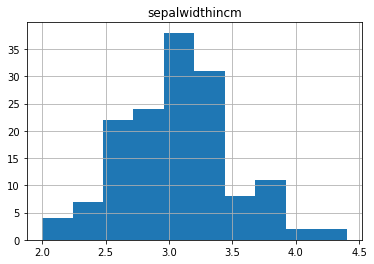

In [27]:
df.hist(column='sepalwidthincm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AAD46DDA08>]],
      dtype=object)

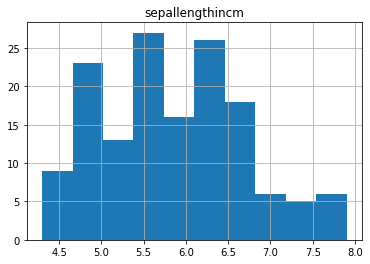

In [28]:

df.hist(column='sepallengthincm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AAD41CB448>]],
      dtype=object)

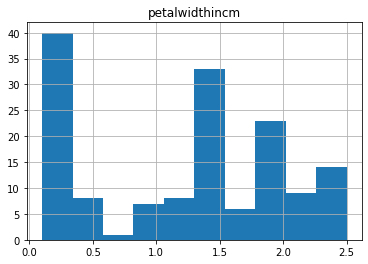

In [30]:
df.hist(column='petalwidthincm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AAD4A38808>]],
      dtype=object)

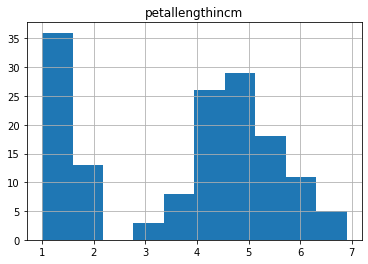

In [31]:
df.hist(column='petallengthincm')

### Correlation Matrix

In [32]:
df.corr()

,sepallengthincm,sepalwidthincm,petallengthincm,petalwidthincm
sepallengthincm,1.000000,-0.103784,0.871283,0.816971
sepalwidthincm,-0.103784,1.000000,-0.415218,-0.350733
petallengthincm,0.871283,-0.415218,1.000000,0.962314
petalwidthincm,0.816971,-0.350733,0.962314,1.000000


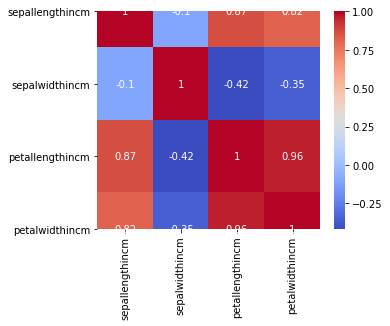

In [33]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

### Scatter Plot

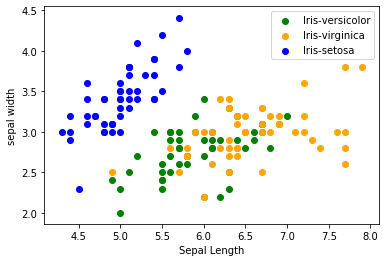

In [35]:
colors = ['green', 'orange', 'blue']
species = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepallengthincm'], x['sepalwidthincm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("sepal width")
plt.legend()

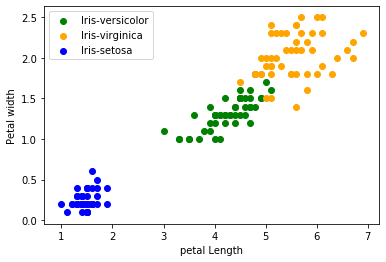

In [36]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petallengthincm'], x['petalwidthincm'], c = colors[i], label=species[i])
plt.xlabel("petal Length")
plt.ylabel("Petal width")
plt.legend()

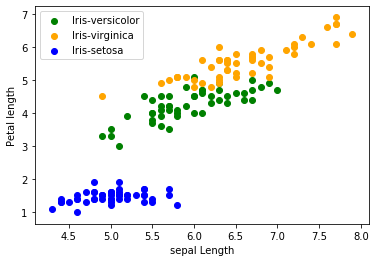

In [37]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepallengthincm'], x['petallengthincm'], c = colors[i], label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("Petal length")
plt.legend()

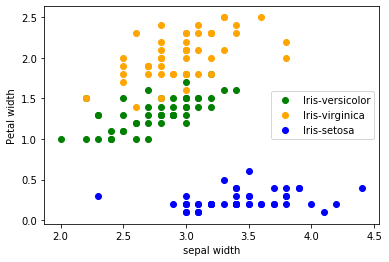

In [38]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepalwidthincm'], x['petalwidthincm'], c = colors[i], label=species[i])
plt.xlabel("sepal width")
plt.ylabel("Petal width")
plt.legend()

### Training Model

In [48]:
x = df.drop(columns=['species'])
y = df['species']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# KNN

In [54]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
print("Accuracy of the model is: ",model.score(x_test, y_test)*100)

Accuracy of the model is:  96.66666666666667


# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  93.33333333333333
